In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
raw_train_df = pd.read_csv('train.csv')
raw_test_df = pd.read_csv('test.csv')

In [3]:
raw_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
raw_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
raw_train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lobb, Mr. William Arthur",male,1601,G6,S
freq,1,577,7,4,644


## Which features are Categorical and Numerical

In [9]:
raw_train_df.columns

# categorical: Survived, Sex, Embarked
# discrete: SibSp, Parch
# continious: Age, Fare

# nominal:
# ordinal: Pclass
# interval:
# ratio:

# PassengerId, Name, Ticket, Cabin

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Analayze by pivoting features

In [10]:
raw_train_df.info()

# Data not with NAN
# categorical: Survived, Sex, AND discrete: SibSp, Parch AND ordinal: Pclass
# (Embarked has NAN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
raw_train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
raw_train_df[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
raw_train_df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [14]:
raw_train_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Analyze numerical feature by visulazing

In [15]:
# continious: Age, Fare
# categorical: Survived, Sex, AND discrete: SibSp, Parch AND ordinal: Pclass

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


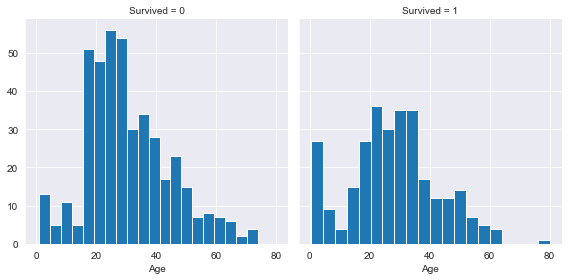

In [16]:
g = sns.FacetGrid(raw_train_df, col='Survived', size=4)
g.map(plt.hist, 'Age', bins=20)

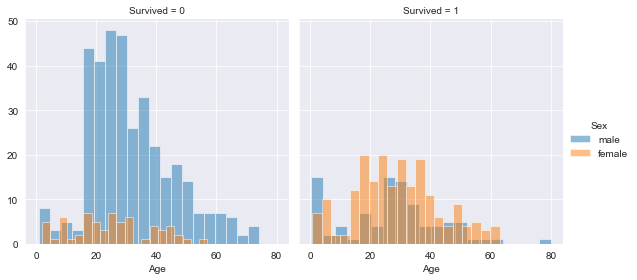

In [17]:
g = sns.FacetGrid(raw_train_df, col='Survived', hue='Sex', size=4)
g.map(plt.hist, 'Age', bins=20, alpha=0.5)
g.add_legend()

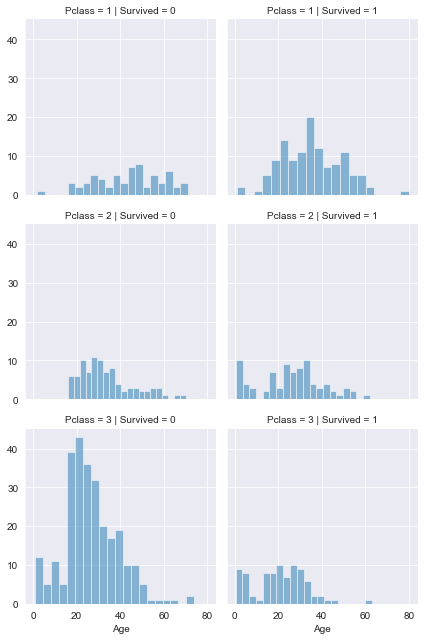

In [18]:
g = sns.FacetGrid(raw_train_df, row='Pclass', col='Survived', size=3)
g.map(plt.hist, 'Age', bins=20, alpha=0.5)

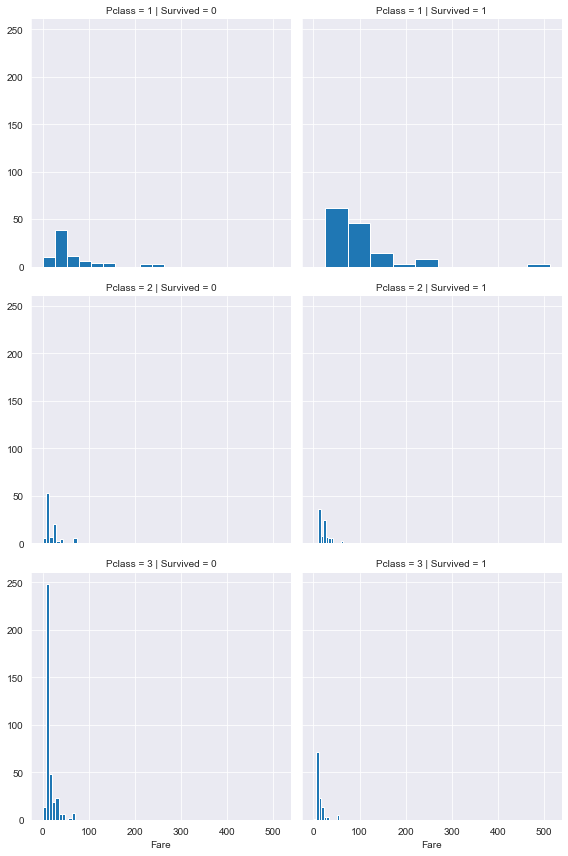

In [19]:
g = sns.FacetGrid(raw_train_df, row='Pclass', col='Survived', size=4)
g.map(plt.hist, 'Fare')

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


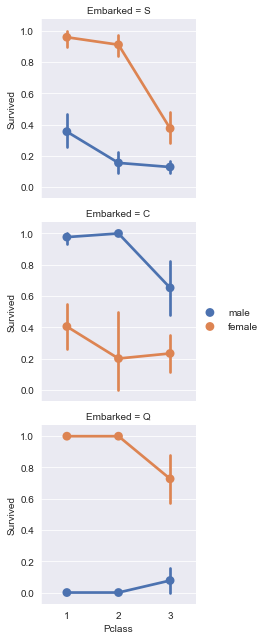

In [20]:
g = sns.FacetGrid(raw_train_df, row='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


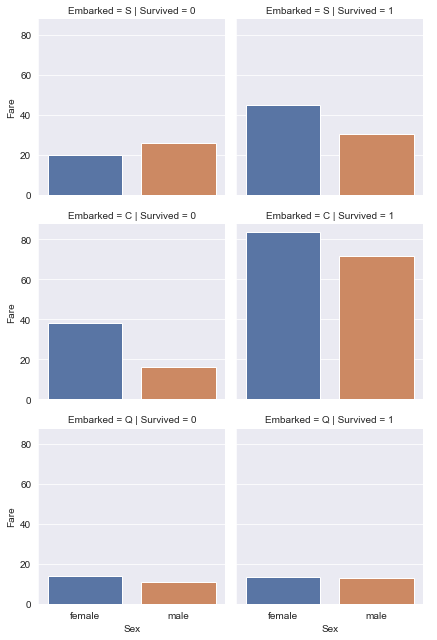

In [21]:
g = sns.FacetGrid(raw_train_df, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', palette='deep', ci=None)
g.add_legend()

## cleanse data (checkpoint)

In [95]:
train_df = raw_train_df.copy()
test_df = raw_test_df.copy()
combine = [train_df, test_df]

In [96]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
# drop
# train_df: PassengerId, Ticket, Cabin
# test_df: Ticket, Cabin
train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [99]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [100]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [101]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S


In [102]:
train_df.info() # Age, Embarked has NAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [103]:
test_df.info() # Age, Fare has NAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


## fill NAN

In [104]:
# fillna Embarked
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [105]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [106]:
for dataset in combine:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [107]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [109]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


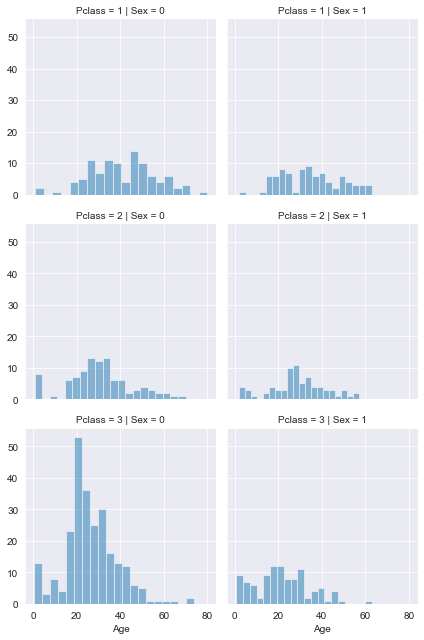

In [110]:
# fillna Age by Pclass
g = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=3)
g.map(plt.hist, 'Age', bins=20, alpha=0.5)

In [111]:
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",0,NaN,0,0,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,9.5000,S
878,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,7.8958,S


In [130]:
# guess_ages = np.zeros((2,3))

# for dataset in combine:
#     for i in range(0, 2):
#         for j in range(0, 3):
#             age_guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna().median()
#             guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
#             dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].fillna(guess_ages[i, j], inplace=True)


guess_ages = np.zeros((3,2))

for dataset in combine:
    for i in range(0, 3):
        for j in range(0, 2):
            age_guess = dataset.loc[(dataset['Pclass'] == i+1) & (dataset['Sex'] == j), 'Age'].dropna().median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
            dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)].fillna({"Age" :guess_ages[i, j]}, inplace=True)
            #dataset.loc[(dataset['Age'].isnull()) & (dataset['Pclass'] == i+1) & (dataset['Sex'] == j), 'Age'] = guess_ages[i,j]

    #dataset['Age'] = dataset['Age'].astype(int)


In [128]:
guess_ages

array([[42., 41.],
       [28., 24.],
       [24., 22.]])

In [129]:
train_df.iloc[[5, 17, 19, 26, 28]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,7.8792,Q


## converting text features to numerical. and creating nuw features

In [41]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S


In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,12.2875,S


In [43]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-z]+)\.', expand=False)
    
    print(dataset['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Don           1
Capt          1
Ms            1
Sir           1
Countess      1
Lady          1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


In [44]:
for dataset in combine:
    dataset['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Don', 'Sir', 'Capt', 'Jonkheer', 'Lady', 'Dona'],
                             'Rare',
                             inplace=True)
    dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)

    print(dataset['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


In [45]:
train_df[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [46]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Mr': 0, 'Rare': 1, 'Master': 2, 'Miss': 3, 'Mrs': 4})

In [47]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,4
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,4
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,0


In [48]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,7.0000,S,4
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",0,27,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,12.2875,S,4


In [49]:
for dataset in combine:
    dataset.drop('Name', axis=1, inplace=True)

In [50]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,0
1,1,1,1,38,1,0,71.2833,C,4
2,1,3,1,26,0,0,7.9250,S,3
3,1,1,1,35,1,0,53.1000,S,4
4,0,3,0,35,0,0,8.0500,S,0


In [51]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34,0,0,7.8292,Q,0
1,893,3,1,47,1,0,7.0000,S,4
2,894,2,0,62,0,0,9.6875,Q,0
3,895,3,0,27,0,0,8.6625,S,0
4,896,3,1,22,1,1,12.2875,S,4


## checkpoint

In [52]:
train_dropping_df = train_df.copy()
test_dropping_df = test_df.copy()
combine_dropping = [train_dropping_df, test_dropping_df]

In [53]:
train_dropping_df['AgeBand'] = pd.cut(train_dropping_df['Age'], 5)
train_dropping_df[['AgeBand', 'Survived']].groupby('AgeBand').mean().sort_values(by='Survived', ascending=False)

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(48.0, 64.0]",0.434783
"(32.0, 48.0]",0.412037
"(16.0, 32.0]",0.337374
"(64.0, 80.0]",0.090909


In [54]:
for dataset in combine_dropping:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4


In [55]:
train_dropping_df['Age'].unique()

array([1, 2, 3, 0, 4])

In [56]:
train_dropping_df.drop('AgeBand', axis=1, inplace=True)
train_dropping_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,0
1,1,1,1,2,1,0,71.2833,C,4
2,1,3,1,1,0,0,7.9250,S,3
3,1,1,1,2,1,0,53.1000,S,4
4,0,3,0,2,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,1
887,1,1,1,1,0,0,30.0000,S,3
888,0,3,1,1,1,2,23.4500,S,3
889,1,1,0,1,0,0,30.0000,C,0


In [57]:
train_dropping_df['FareBand'] = pd.qcut(train_dropping_df['Fare'], 4)
train_dropping_df[['FareBand', 'Survived']].groupby('FareBand').mean().sort_values(by='Survived', ascending=False)

,Survived
FareBand,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


In [58]:
for dataset in combine_dropping:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    
    dataset['Fare'] = dataset['Fare'].astype(int)

In [59]:
train_dropping_df['Fare'].unique()

array([0, 3, 1, 2])

In [60]:
train_dropping_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,0,3,0,1,1,0,0,S,0,"(-0.001, 7.91]"
1,1,1,1,2,1,0,3,C,4,"(31.0, 512.329]"
2,1,3,1,1,0,0,1,S,3,"(7.91, 14.454]"
3,1,1,1,2,1,0,3,S,4,"(31.0, 512.329]"
4,0,3,0,2,0,0,1,S,0,"(7.91, 14.454]"


In [61]:
train_dropping_df.drop('FareBand', axis=1, inplace=True)
train_dropping_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,0,S,0
1,1,1,1,2,1,0,3,C,4
2,1,3,1,1,0,0,1,S,3
3,1,1,1,2,1,0,3,S,4
4,0,3,0,2,0,0,1,S,0


In [62]:
train_dropping_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
for dataset in combine_dropping:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [64]:
train_dropping_df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
1,0.553571
2,0.389610
0,0.339009


In [65]:
train_dropping_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,0,0,0
1,1,1,1,2,1,0,3,1,4
2,1,3,1,1,0,0,1,0,3
3,1,1,1,2,1,0,3,0,4
4,0,3,0,2,0,0,1,0,0


In [66]:
train_dropping_df[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [67]:
train_dropping_df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [68]:
for dataset in combine_dropping:
    dataset['FamilySize'] = 1 + dataset['SibSp'] + dataset['Parch']

In [69]:
train_dropping_df[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [70]:
train_dropping_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,0,0,0,2
1,1,1,1,2,1,0,3,1,4,2
2,1,3,1,1,0,0,1,0,3,1
3,1,1,1,2,1,0,3,0,4,2
4,0,3,0,2,0,0,1,0,0,1


In [71]:
for dataset in combine_dropping:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [72]:
train_dropping_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,0,2,0
1,1,1,1,2,1,0,3,1,4,2,0
2,1,3,1,1,0,0,1,0,3,1,1
3,1,1,1,2,1,0,3,0,4,2,0
4,0,3,0,2,0,0,1,0,0,1,1


In [73]:
for dataset in combine_dropping:
    dataset['Age*Pclass'] = dataset['Age'] * dataset['Pclass']

In [74]:
train_dropping_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Pclass
0,0,3,0,1,1,0,0,0,0,2,0,3
1,1,1,1,2,1,0,3,1,4,2,0,2
2,1,3,1,1,0,0,1,0,3,1,1,3
3,1,1,1,2,1,0,3,0,4,2,0,2
4,0,3,0,2,0,0,1,0,0,1,1,6


In [75]:
test_dropping_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Pclass
0,892,3,0,2,0,0,0,2,0,1,1,6
1,893,3,1,2,1,0,0,0,4,2,0,6
2,894,2,0,3,0,0,1,2,0,1,1,6
3,895,3,0,1,0,0,1,0,0,1,1,3
4,896,3,1,1,1,1,1,0,4,3,0,3


## modeling

In [76]:
preprocesed_train_df = train_dropping_df.copy()
preprocesed_test_df = test_dropping_df.copy()

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [78]:
X_train = preprocesed_train_df.drop('Survived', axis=1)
y_train = preprocesed_train_df['Survived']
X_test = preprocesed_test_df.drop('PassengerId', axis=1)

In [79]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8226711560044894

In [80]:
clf.coef_

array([[-0.65703321, -0.30058055, -0.13427003, -0.52343285, -0.28092736,
         0.24013655,  0.23558371,  1.00278247, -0.08416439, -0.22180712,
        -0.25867825]])

In [81]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'Age*Pclass'],
      dtype='object')

In [82]:
coeff_df = pd.DataFrame(index=X_train.columns, columns=['Coefficient'])
coeff_df['Coefficient'] = clf.coef_.transpose()
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Title,1.002782
Fare,0.240137
Embarked,0.235584
FamilySize,-0.084164
Age,-0.134270
IsAlone,-0.221807
Age*Pclass,-0.258678
Parch,-0.280927
Sex,-0.300581
SibSp,-0.523433


In [83]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8417508417508418

In [84]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8484848484848485

In [85]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8069584736251403

In [86]:
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.712682379349046

In [87]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8271604938271605

In [88]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8103254769921436

In [89]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8900112233445566

In [90]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8866442199775533

## Result DecisionTreeClassifier is the Best ?

In [91]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.8900112233445566

In [92]:
submission = pd.DataFrame({"PassengerId": raw_test_df["PassengerId"], "Survived": y_pred})

In [93]:
submission.to_csv('Review_Manavs_but_alittle_diff.csv', index=False)

In [94]:
# I'm a beginner of Data Science and this was my first Kaggle. 
# Thank you for this very helpful tutorial.
# I have 3 questions. If possible please help me.

# Q1.
# In[25]
# for i in range(0, 2):
#         for j in range(0, 3):

# (These for loop were used twice. Was it necessity ? It seems to work, without the second for loop set.)

# Q2.
# In[25]
# dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

# ( I tried here with this code.)

# dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].fillna(guess_ages[i, j], inplace=True)

# (Reading the Pandas Documentation I understand **.loc** is faster.  And will use this. But reviewing, first I came up with the **fillna() **. But doesn't fill NAN. Why doesn't this work ?)

# Q3.
# In[27]
# dataset.loc[ dataset['Age'] > 64, 'Age']

# (Isn't this  (= 4) ? Or was it needless to do so because the number of (Age > 64) was few ?)

# Excuse me for a long comment.
# Thank you